In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#reading the dataset
cp = pd.read_csv('CarPrice.csv')
#taking the subset of the data
cp=cp[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
#printing first five rows of the data
cp.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Checking the distibution with skewness

In [2]:
#skewness in the data
cp.skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

The variables with skewness > 1 such as wheelbase, compressionratio, horsepower, price are highly positively skewed.<br>
The variables with skewness < -1 are highly negatively skewed.<br>
The variables with 0.5 < skewness < 1 such as carwidth, curbweight, citympg are moderately positively skewed.<br>
The variables with -0.5 < skewness < -1 such as stroke are moderately negatively skewed.<br>
And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as symboling, carheight, boreration, peakrpm, highwaympg.<br>

#### Checking the diatributuin using  histograms

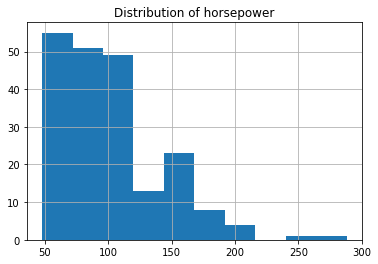

In [5]:
cp.horsepower.hist()
plt.title('Distribution of horsepower');

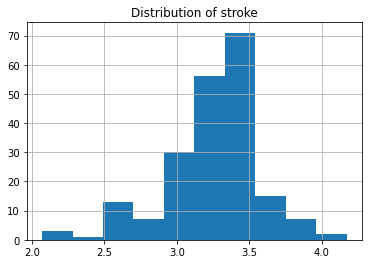

In [6]:
cp.stroke.hist()
plt.title('Distribution of stroke');

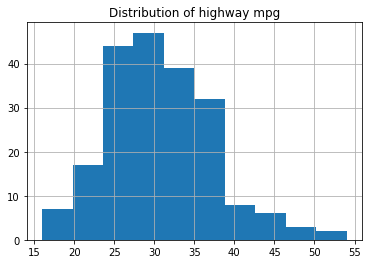

In [7]:
cp.highwaympg.hist()
plt.title('Distribution of highway mpg');

### KDE Plot

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

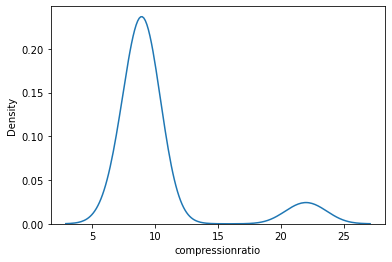

In [13]:
sns.kdeplot(cp.compressionratio)

<AxesSubplot:xlabel='price', ylabel='Density'>

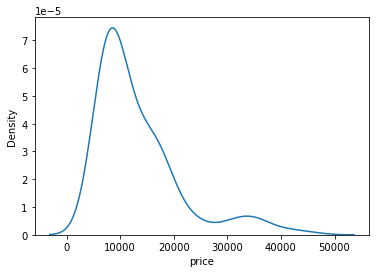

In [14]:
sns.kdeplot(cp.price)

Both the distributions are positively skewed

### Q-Q Plot

In [16]:
import scipy.stats as stats
import pylab

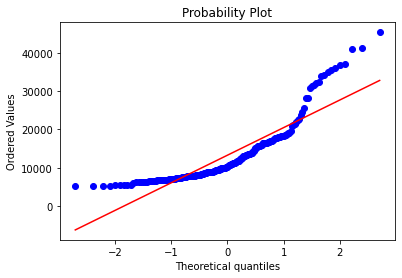

In [18]:
stats.probplot(cp.price,plot=pylab);

In [19]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

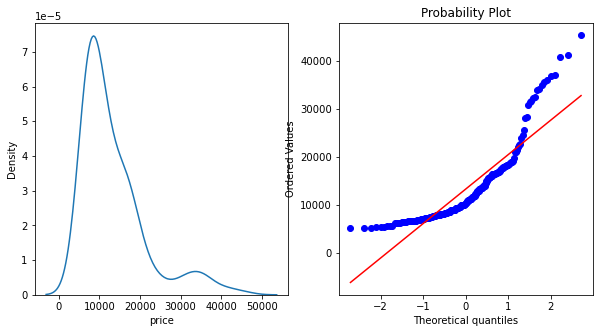

In [21]:
normality(cp,'price')

## Transformation on Price variable

### Logarithmic Transformation

In [24]:
#performing logarithmic transformation on the feature
cp['price_log']=np.log(cp['price'])

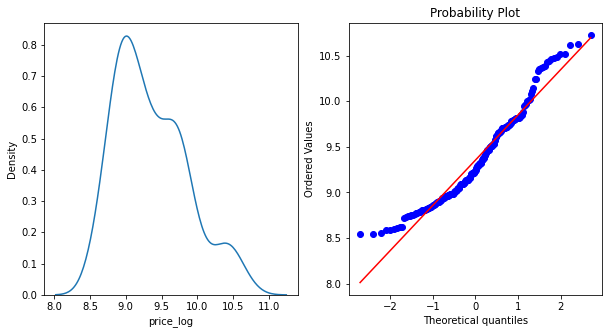

In [25]:
#plotting to check the transformation
normality(cp,'price_log')

The distribution changed a little bit and looks moderately skewed now. More data points are also falling on the line in the Q-Q plot.

### Reciprocal Transformation

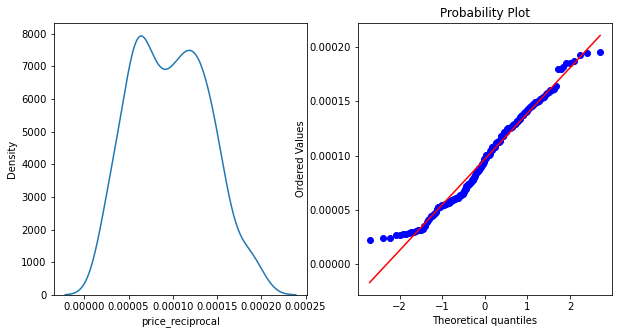

In [26]:
cp['price_reciprocal']=1/cp.price
normality(cp,'price_reciprocal')

Most of the data points are also falling on the line in the Q-Q plot. This one is better than the log transformation for the Price feature.

### Square root transformation

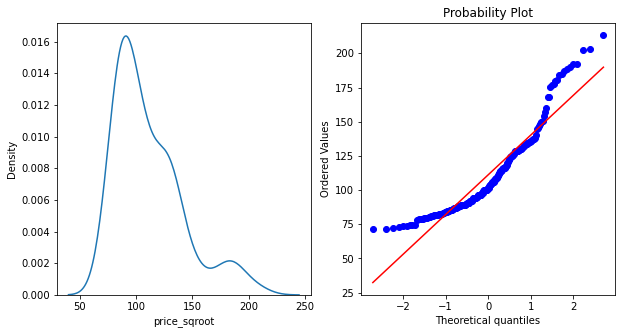

In [27]:
cp['price_sqroot']=np.sqrt(cp.price)
normality(cp,'price_sqroot')

It has reduced the skewness of the feature but has not transformed it into a normal distribution

### Exponential Transformation

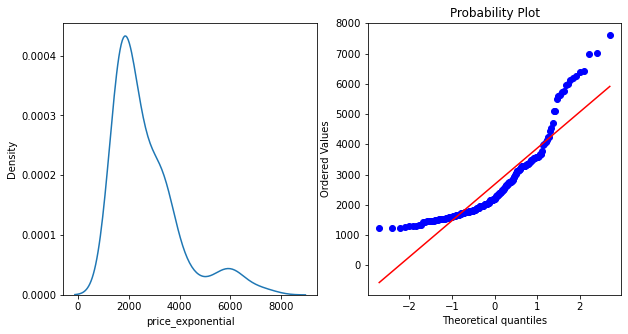

In [29]:
cp['price_exponential']=cp.price**(1/1.2)
normality(cp,'price_exponential')

### Box-cox Transformations


In case of box-cox y is the response variable and λ is the transformation parameter. λ value varies from -5 to 5. During the transformation, all values of λ are considered and the optimal/best value for the variable is selected. log(y) is only applied when λ=0.

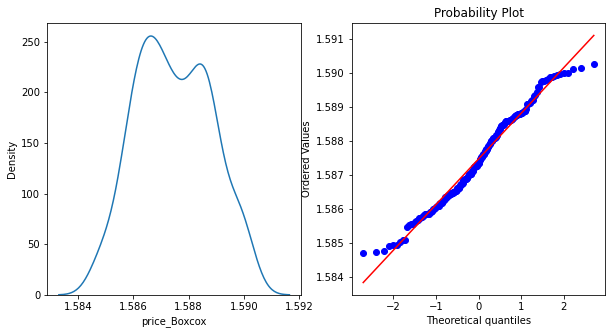

In [30]:
cp['price_Boxcox'],parameters=stats.boxcox(cp['price'])
normality(cp,'price_Boxcox')

This transformation technique also gives a good result and normally distributes the Price feature

From all the transformations discussed above, we can conclude that the Box cox and Reciprocal transformation perform the best on the Price variable and transform it to normal distribution.